In [1]:
import pickle
import missingno as msno

In [2]:
# transfermarkt Site
with open('datas/premier_players.pkl', 'rb') as f:
    datas = pickle.load(f)

# whoscored Site
with open('datas/premier_total.pkl', 'rb') as f:
    datas2 = pickle.load(f)

In [2]:
pd.set_option('display.max_columns', None)

In [4]:
print(datas.shape)
datas.tail(2)

(516, 21)


,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,citizenship,position,foot,agent,club,joined,expire,last_contract,outfitter,sns,caps_goals
514,Mbaye Diagne,£2.70m,13,2,2,2,-,-,29,"1,91 m",1,attack-Centre-Forward,right,GOAL CLUB,West Bromwich Albion,"Jan 29, 2021","Jun 30, 2021","Aug 31, 2019",adidas,1,None
515,Hal Robson-Kanu,£1.62m,15,-,-,1,-,-,31,"1,83 m",1,attack-Centre-Forward,left,no agent,West Bromwich Albion,"Aug 31, 2016","Jun 30, 2021","Jul 6, 2017",adidas,2,9.2


In [5]:
print(datas2.shape)
datas2.tail(2)

(516, 30)


,Apps,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Rating_x,Position,Team,Age,name,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch
514,1,90,0,0,0,0,0,0,0,0,5.41,GK,Chelsea,39,Willy Caballero,0,0,24.0,91.7,0,2,0,5.41,0,0,0,0,0,0,0
515,1,90,5,0,1,1,3,0,0,0,5.06,Defender,Southampton,20,Kayne Ramsay,0,0,19.0,78.9,0,0,0,5.06,0,0,0,0,0,0,0


In [6]:
datas.replace({'-': '0'}, inplace=True) # 0인 데이터에 대해 - : 0 으로 replace
datas["market_value"] = datas["market_value"].apply(lambda x: str(x)[1:]) # £ 제거

In [7]:
# market_value의 단위를 변환해주는 함수 
def converter(value):
    if value == "one":
        m_value = np.NaN
    elif value[-1] == "m":
        m_value = int(value.replace('m', '0000').replace('.', ''))
    elif value[-3:] == "Th.":
        m_value = int(value.replace('Th.', '000').replace('.', ''))
    return m_value

In [8]:
datas['market_value'] = datas['market_value'].apply(converter)
datas['market_value'] = datas['market_value'].astype('float')

# height value에서 ,와 m 제거
datas['height'] = datas['height'].apply(lambda x: x.replace('m', '').replace(',', '').strip())

In [10]:
datas[datas['market_value'].isnull()]

,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,citizenship,position,foot,agent,club,joined,expire,last_contract,outfitter,sns,caps_goals
98,Hannibal Mejbri,NaN,18,3,8,5,0,1,18,182,1,midfield-CentralMidfield,right,Fabio Mello Sports,Manchester United U23,"Jul 1, 2020","Jun 30, 2026","Mar 16, 2021",adidas,1,1.5
103,Anthony Elanga,NaN,15,7,2,0,0,0,19,178,1,attack-LeftWinger,right,ICM Stellar Sports,Manchester United U23,"Jul 1, 2020",0,"Mar 16, 2021",Nike,2,2.5
211,Andreas Söndergaard,NaN,16,21,7,0,0,0,20,188,1,Goalkeeper,right,New Era Global Sports,Wolverhampton Wanderers U23,"Jan 26, 2018","Jun 30, 2023","Dec 17, 2020",Puma,1,NaN
317,Sam McQueen,NaN,None,None,None,None,None,None,26,181,1,Defender-Left-Back,left,New Vision,Southampton FC,"Jul 1, 2016","Jun 30, 2021","Dec 5, 2016",Nike,2,NaN
400,Ouasim Bouy,NaN,None,None,None,None,None,None,27,181,1,midfield-DefensiveMidfield,left,Mino Raiola,Leeds United,"Aug 1, 2017","Jun 30, 2021","Sep 9, 2019",Nike,1,6.0
443,Simon Moore,NaN,None,None,None,None,None,None,30,191,1,Goalkeeper,right,Wasserman,Sheffield United,"Aug 19, 2016","Jun 30, 2021","Jul 26, 2018",Nike,1,NaN


In [11]:
datas.loc[98, 'market_value'] = '9.00m' # market_value가 없어 19/20 fee로 대체
datas.loc[103, 'market_value'] = None # market_value, fee 존재 x
datas.loc[211, 'market_value'] = None # market_value, fee 존재 x
datas.loc[317, 'market_value'] = '720Th.' # 왜 못갖고온지 모르겠음
datas.loc[400, 'market_value'] = '270Th.' # 왜 못갖고온지 모르겠음
datas.loc[443, 'market_value'] = '360Th.' # 왜 못갖고온지 모르겠음
datas[datas['market_value'].isnull()]

,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,citizenship,position,foot,agent,club,joined,expire,last_contract,outfitter,sns,caps_goals
103,Anthony Elanga,None,15,7,2,0,0,0,19,178,1,attack-LeftWinger,right,ICM Stellar Sports,Manchester United U23,"Jul 1, 2020",0,"Mar 16, 2021",Nike,2,2.5
211,Andreas Söndergaard,None,16,21,7,0,0,0,20,188,1,Goalkeeper,right,New Era Global Sports,Wolverhampton Wanderers U23,"Jan 26, 2018","Jun 30, 2023","Dec 17, 2020",Puma,1,NaN


In [12]:
# 합치기 전에 두 dataframe의 name 컬럼 전처리
datasets = [datas, datas2]
for dataset in datasets:
    dataset['name'] = dataset['name'].apply(lambda x: x.strip())
    dataset['name'] = dataset['name'].apply(lambda x: x.replace(" ", "").replace("-", ""))

In [ ]:
# name을 기준으로 merge
dfs = pd.merge(datas, datas2, on='name')

with open('datas/final_total_df.pkl', 'wb') as f:
    pickle.dump(dfs, f)

In [3]:
with open('datas/final_total_df.pkl', 'rb') as f:
    premier_df = pickle.load(f)

In [4]:
# 후에 datetime으로 변환하기 위한 날짜 데이터 전처리
mon_datas = {"Jan": "1", "Feb": "2", "Mar": "3", "Apr": "4", "May": "5", "Jun": "6",
            "Jul": "7", "Aug": "8", "Sep": "9", "Oct": "10", "Nov": "11", "Dec": "12"}

def converter_date(date):
    try:
        mon, year = date.split(",")
        year = year.strip()
        mon, day = mon.split(" ")
        for key, value in mon_datas.items():
            mon = mon.replace(key, str(value))
            
        result = year + "-" + mon + "-" + day
    except:
        result = None
    
    return result

In [5]:
premier_df['joined'] = premier_df['joined'].apply(converter_date)
premier_df['last_contract'] = premier_df['last_contract'].apply(converter_date)
premier_df['expire'] = premier_df['expire'].apply(converter_date)

In [6]:
premier_df.tail(2)

,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,citizenship,position,foot,agent,club,joined,expire,last_contract,outfitter,sns,caps_goals,Apps,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Rating_x,Position,Team,Age,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch
516,MbayeDiagne,2700000.0,13,2,2,2,0,0,29,191,1,attack-Centre-Forward,right,GOAL CLUB,West Bromwich Albion,2021-1-29,2021-6-30,2019-8-31,adidas,1,NaN,1,90,0,0,0,0,0,0,0,0,5.41,GK,Chelsea,39,0,0,24.0,91.7,0,2,0,5.41,0,0,0,0,0,0,0
517,HalRobsonKanu,1620000.0,15,0,0,1,0,0,31,183,1,attack-Centre-Forward,left,no agent,West Bromwich Albion,2016-8-31,2021-6-30,2017-7-6,adidas,2,9.2,1,90,5,0,1,1,3,0,0,0,5.06,Defender,Southampton,20,0,0,19.0,78.9,0,0,0,5.06,0,0,0,0,0,0,0


In [7]:
print(len(premier_df['position'].unique()))
premier_df['position'].unique()

13


array(['Goalkeeper', 'Defender-Centre-Back', 'Defender-Left-Back',
       'Defender-Right-Back', 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield',
       'attack-LeftWinger', 'attack-RightWinger', 'attack-Centre-Forward',
       'midfield-RightMidfield', 'midfield-LeftMidfield',
       'attack-SecondStriker'], dtype=object)

In [8]:
def pp_position(position):
    try:
        position = position.split('-')[0]
    except:
        position = position
    
    return position

In [9]:
# main position만 리턴
premier_df['position'] = premier_df['position'].apply(pp_position)

In [10]:
# 겹치거나 중복된 컬럼 제거
premier_df.drop(columns=["caps_goals", "Apps", "Mins", "Position", "Team", "Age", "Rating_x"], inplace=True)

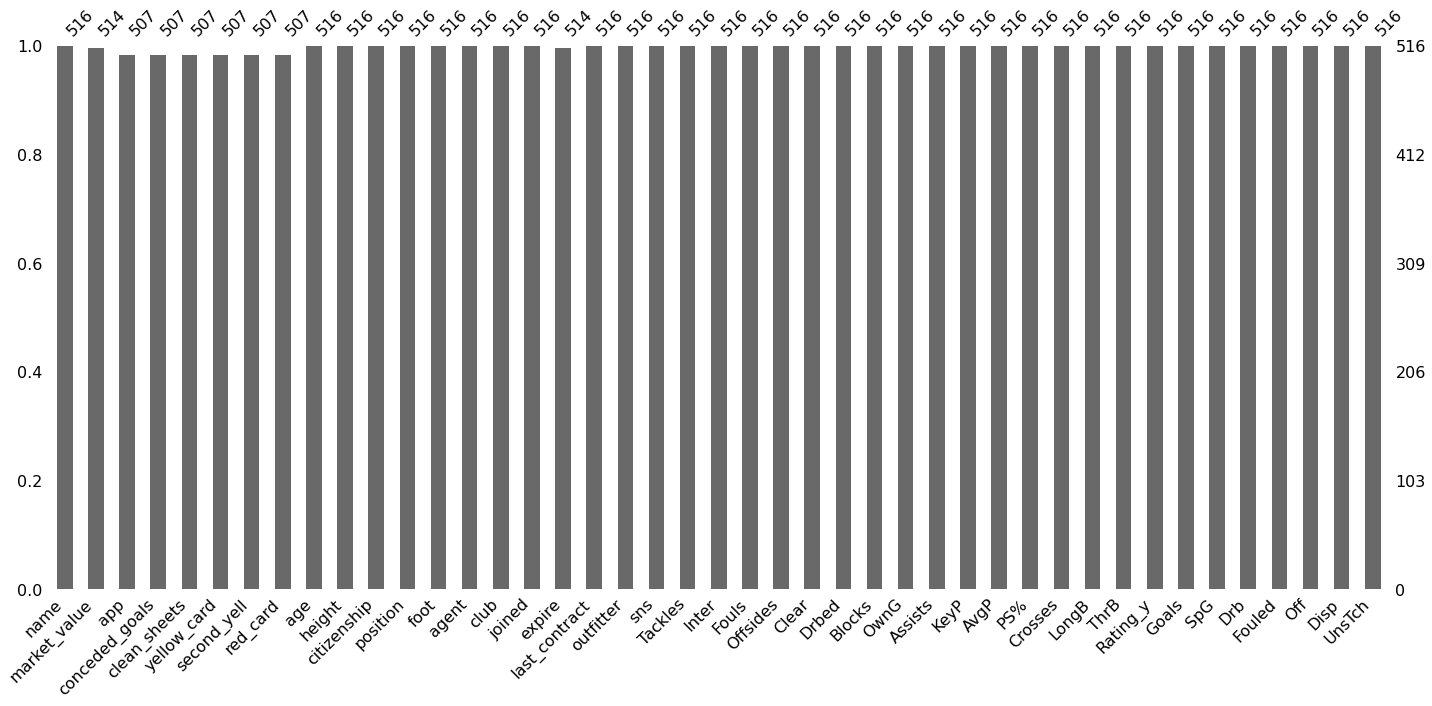

In [11]:
msno.bar(premier_df);

In [12]:
# market_value가 존재하지 않는 players -> 타겟변수이기 때문에 2rows 제거예정
premier_df[premier_df['market_value'].isnull()]

,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,citizenship,position,foot,agent,club,joined,expire,last_contract,outfitter,sns,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch
106,AnthonyElanga,NaN,15,7,2,0,0,0,19,178,1,attack,right,ICM Stellar Sports,Manchester United U23,2020-7-1,None,2021-3-16,Nike,2,1.3,1.9,0.9,0.5,4.3,0.6,0.4,0,0,0.1,52.3,81.3,0.2,4.3,0,6.89,3,0.9,0.4,0.4,0,0.1,0.4
213,AndreasSöndergaard,NaN,16,21,7,0,0,0,20,188,1,Goalkeeper,right,New Era Global Sports,Wolverhampton Wanderers U23,2018-1-26,2023-6-30,2020-12-17,Puma,1,1.3,0.9,1.1,0.1,0.9,1.1,0.1,0,0,0.5,46.7,86.3,0,2.0,0,6.68,0,0.7,0.4,0.6,0,0.2,0.4


In [13]:
# transfermarkt Site에 크롤링한 테이블이 없는 players
premier_df[premier_df['app'].isnull()]

,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,citizenship,position,foot,agent,club,joined,expire,last_contract,outfitter,sns,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch
74,CharlyMusondaJr.,900000.0,None,None,None,None,None,None,24,173,1,midfield,right,ICM Stellar Sports,Chelsea FC,2017-7-1,2022-6-30,2017-12-8,Nike,1,2.1,1.6,1.1,0,0.8,1.6,0.2,0,1,0.8,64.8,89.3,0.1,2.6,0,6.96,6,0.5,0.5,1.1,0,0.4,0.6
83,SergioRomero,1350000.0,None,None,None,None,None,None,34,192,1,Goalkeeper,right,ICM Stellar Sports,Manchester United,2015-7-27,2021-6-30,2017-7-16,adidas,2,1.6,0.6,1,0.1,1.2,0.7,0.2,0,2,1.3,50.6,88.1,1.1,2.3,0,6.93,1,1.1,1,0.6,0,0.7,0.9
90,PhilJones,4500000.0,None,None,None,None,None,None,29,185,1,Defender,right,Wasserman,Manchester United,2011-7-1,2023-6-30,2019-2-8,adidas,1,2,3.0,1,0,1.0,0,0,0,0,2,66.0,90.9,1,1.0,0,6.92,0,1,2,0,1,2,0
198,MuhamedBesic,1800000.0,None,None,None,None,None,None,28,180,1,midfield,right,no agent,Everton FC,2014-7-28,2021-6-30,2016-2-29,Nike,3,1.7,1.8,0.9,0.4,4.4,0.6,0.4,0,0,0,34.4,75.1,0,3.1,0,6.71,1,0.6,0.1,0.2,0,0,0.2
235,RenatDadashov,270000.0,None,None,None,None,None,None,21,186,1,attack,right,Universal Sports Group,Wolverhampton Wanderers,2019-8-6,2023-6-30,2020-10-3,Nike,1,0.6,1.2,0.9,0,0.8,0.8,0.3,0,3,1.3,53.4,78.7,1.2,4.3,0,6.64,2,0.5,0.3,1.2,0,0.3,0.8
319,SamMcQueen,720000.0,None,None,None,None,None,None,26,181,1,Defender,left,New Vision,Southampton FC,2016-7-1,2021-6-30,2016-12-5,Nike,2,1.0,0.5,0.8,0,0.6,0.9,0.1,0,1,0.5,35.3,85.6,0.4,1.2,0,6.50,0,0.5,0.3,0.5,0,0.5,0.5
402,OuasimBouy,270000.0,None,None,None,None,None,None,27,181,1,midfield,left,Mino Raiola,Leeds United,2017-8-1,2021-6-30,2019-9-9,Nike,1,0.2,0.2,0.2,0,0,0.7,0,0,0,0.4,11.4,80.6,0,0.1,0,6.30,1,1,0.2,0.7,0.1,0.7,1.1
421,NathanFerguson,3600000.0,None,None,None,None,None,None,20,184,1,Defender,right,Sport Avenir Management International,Crystal Palace,2020-7-27,2023-6-30,2020-8-21,Puma,1,0.9,0.5,0.9,0.1,0.9,1.2,0.3,0,2,0.7,36.8,84.1,0.4,1.9,0,6.24,0,0.7,0.6,0.7,0,0.7,1.1
445,SimonMoore,360000.0,None,None,None,None,None,None,30,191,1,Goalkeeper,right,Wasserman,Sheffield United,2016-8-19,2021-6-30,2018-7-26,Nike,1,0.3,0.3,0.5,0,0.8,0.1,0,0,0,0.2,11.7,75.2,0,0.1,0,6.19,1,0.9,0.5,0.7,0.3,0.8,1.7


In [14]:
# 만기일이 없는 players
premier_df[premier_df['expire'].isnull()]

,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,citizenship,position,foot,agent,club,joined,expire,last_contract,outfitter,sns,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch
31,RhysWilliams,4500000.0,3,1,0,1,0,0,20,195,1,Defender,right,ICM Stellar Sports,Liverpool FC U23,2019-7-1,None,2019-2-26,adidas,1,1.4,0.7,1.3,0.1,1.2,0.4,0.3,1,5,2.3,50.3,85.2,1.9,0.9,0,7.09,1,0.3,1.1,0.8,0.1,0.6,0.8
106,AnthonyElanga,NaN,15,7,2,0,0,0,19,178,1,attack,right,ICM Stellar Sports,Manchester United U23,2020-7-1,None,2021-3-16,Nike,2,1.3,1.9,0.9,0.5,4.3,0.6,0.4,0,0,0.1,52.3,81.3,0.2,4.3,0,6.89,3,0.9,0.4,0.4,0,0.1,0.4


In [15]:
# 추가로 크롤링한 컬럼을 기존 dataframe에 추가
with open('datas/summary.pkl', 'rb') as f:
    summary = pickle.load(f)

In [16]:
premier_df = pd.merge(premier_df, summary, on='name', how='left')
print(premier_df.shape)
premier_df.tail(3)

(520, 45)


,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,citizenship,position,foot,agent,club,joined,expire,last_contract,outfitter,sns,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch,AerialsWon,MotM
517,CallumRobinson,5400000.0,25,5,0,0,0,0,26,178,1,attack,right,Wasserman,West Bromwich Albion,2020-9-9,2025-6-30,2019-8-31,adidas,2,0,0,0,0,0,0,0,0,0,0,25.0,76,0,8,0,5.65,0,0,0,0,0,0,0,0.7,1
518,MbayeDiagne,2700000.0,13,2,2,2,0,0,29,191,1,attack,right,GOAL CLUB,West Bromwich Albion,2021-1-29,2021-6-30,2019-8-31,adidas,1,0,0,0,0,0,0,0,0,0,0,24.0,91.7,0,2,0,5.41,0,0,0,0,0,0,0,3.6,1
519,HalRobsonKanu,1620000.0,15,0,0,1,0,0,31,183,1,attack,left,no agent,West Bromwich Albion,2016-8-31,2021-6-30,2017-7-6,adidas,2,5,0,1,1,3,0,0,0,0,0,19.0,78.9,0,0,0,5.06,0,0,0,0,0,0,0,0.1,-


In [17]:
premier_df['name'].value_counts()

Rodrigo            4
BenDavies          2
TakumiMinamino     2
EzgjanAlioski      1
HarrisonReed       1
                  ..
JamalLewis         1
PercyTau           1
TimothyCastagne    1
MateoKovacic       1
FabianDelph        1
Name: name, Length: 515, dtype: int64

In [18]:
# Rodrigo 3개, TakumiMinamino 1개 / 중복된 데이터 제거
premier_df.drop(index=[326, 412, 413, 414], inplace=True)
print(premier_df.shape)
premier_df.tail()

(516, 45)


,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,citizenship,position,foot,agent,club,joined,expire,last_contract,outfitter,sns,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch,AerialsWon,MotM
515,RobertSnodgrass,1800000.0,11,0,0,2,0,0,33,182,1,attack,left,SMI Sports Management,West Bromwich Albion,2021-1-8,2022-6-30,2019-8-31,Nike,2,0,0,0,0,0,1,0,0,0,0,2.0,100,0,0,0,5.74,0,0,0,0,0,2,1,1.1,-
516,KarlanGrant,8100000.0,18,1,0,1,0,0,23,183,1,attack,right,ICM Stellar Sports,West Bromwich Albion,2020-10-15,2026-6-30,2019-8-31,adidas,2,1,0,0.5,0,0,0,0,0,0,0,1.5,66.7,0,0,0,5.68,0,0,0,0.5,0,0,0.5,0.7,1
517,CallumRobinson,5400000.0,25,5,0,0,0,0,26,178,1,attack,right,Wasserman,West Bromwich Albion,2020-9-9,2025-6-30,2019-8-31,adidas,2,0,0,0,0,0,0,0,0,0,0,25.0,76,0,8,0,5.65,0,0,0,0,0,0,0,0.7,1
518,MbayeDiagne,2700000.0,13,2,2,2,0,0,29,191,1,attack,right,GOAL CLUB,West Bromwich Albion,2021-1-29,2021-6-30,2019-8-31,adidas,1,0,0,0,0,0,0,0,0,0,0,24.0,91.7,0,2,0,5.41,0,0,0,0,0,0,0,3.6,1
519,HalRobsonKanu,1620000.0,15,0,0,1,0,0,31,183,1,attack,left,no agent,West Bromwich Albion,2016-8-31,2021-6-30,2017-7-6,adidas,2,5,0,1,1,3,0,0,0,0,0,19.0,78.9,0,0,0,5.06,0,0,0,0,0,0,0,0.1,-


In [19]:
# MotM(Match of the Man)의 결측치 처리
premier_df['MotM'] = premier_df['MotM'].replace('-',0)
premier_df['MotM'] = premier_df['MotM'].fillna(0)
premier_df['MotM'] = premier_df['MotM'].astype(int)

# AerialWon의 결측치 처리
premier_df['AerialsWon'] = premier_df['AerialsWon'].replace('-',0)
premier_df['AerialsWon'] = premier_df['AerialsWon'].fillna(0)
premier_df['AerialsWon'] = premier_df['AerialsWon'].astype(float)

In [20]:
premier_df.reset_index(drop=True, inplace=True)
premier_df.tail(2)

,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,citizenship,position,foot,agent,club,joined,expire,last_contract,outfitter,sns,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch,AerialsWon,MotM
514,MbayeDiagne,2700000.0,13,2,2,2,0,0,29,191,1,attack,right,GOAL CLUB,West Bromwich Albion,2021-1-29,2021-6-30,2019-8-31,adidas,1,0,0,0,0,0,0,0,0,0,0,24.0,91.7,0,2,0,5.41,0,0,0,0,0,0,0,3.6,1
515,HalRobsonKanu,1620000.0,15,0,0,1,0,0,31,183,1,attack,left,no agent,West Bromwich Albion,2016-8-31,2021-6-30,2017-7-6,adidas,2,5,0,1,1,3,0,0,0,0,0,19.0,78.9,0,0,0,5.06,0,0,0,0,0,0,0,0.1,0


In [21]:
with open('datas/premierleague_players.pkl', 'wb') as f:
    pickle.dump(premier_df, f)